In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
# Görüntü boyutları ve diğer önemli parametreler
img_width, img_height = 256,256
batch_size = 32

In [3]:
test_dir = r'C:\Users\aeter\OneDrive\Masaüstü\DS\Testing'
train_dir = r'C:\Users\aeter\OneDrive\Masaüstü\DS\Training'
validation_dir = r'C:\Users\aeter\OneDrive\Masaüstü\DS\Validation'

In [4]:
# Veri artırma için parametreler
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Görüntü piksellerini normalize et
    rotation_range=20,  # Rastgele döndürme
    width_shift_range=0.2,  # Yatay kaydırma
    height_shift_range=0.2,  # Dikey kaydırma
    shear_range=0.2,  # Kesme dönüşü
    zoom_range=0.2,  # Rastgele yakınlaştırma
    horizontal_flip=True  # Yatay simetri
)
test_datagen = ImageDataGenerator(rescale=1./255)  # Test verisi için sadece yeniden ölçeklendirme yap

validation_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(img_width, img_height),  
    batch_size=batch_size,
    class_mode='binary'  
)

Found 1885 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 571 images belonging to 2 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,  
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 707 images belonging to 2 classes.


In [8]:
input_layer=Input(shape=(img_width,img_height,3))

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [11]:
# Model özeti
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 256)               6

In [12]:
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator
)

Epoch 1/40
59/59 [==============================] - 44s 670ms/step - loss: 0.7225 - accuracy: 0.5056 - val_loss: 0.6641 - val_accuracy: 0.4809
Epoch 2/40
59/59 [==============================] - 41s 685ms/step - loss: 0.6639 - accuracy: 0.5915 - val_loss: 0.5209 - val_accuracy: 0.8769
Epoch 3/40
59/59 [==============================] - 43s 728ms/step - loss: 0.6520 - accuracy: 0.6271 - val_loss: 0.5274 - val_accuracy: 0.8416
Epoch 4/40
59/59 [==============================] - 44s 741ms/step - loss: 0.6249 - accuracy: 0.6568 - val_loss: 0.4690 - val_accuracy: 0.8331
Epoch 5/40
59/59 [==============================] - 44s 736ms/step - loss: 0.6219 - accuracy: 0.6647 - val_loss: 0.4422 - val_accuracy: 0.8373
Epoch 6/40
59/59 [==============================] - 44s 746ms/step - loss: 0.6011 - accuracy: 0.6700 - val_loss: 0.4677 - val_accuracy: 0.7581
Epoch 7/40
59/59 [==============================] - 48s 819ms/step - loss: 0.5934 - accuracy: 0.6844 - val_loss: 0.4509 - val_accuracy: 0.7949

In [13]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

18/18 [==============================] - 3s 184ms/step - loss: 0.3824 - accuracy: 0.8126
Test Loss: 0.3823698163032532
Test Accuracy: 0.8126094341278076


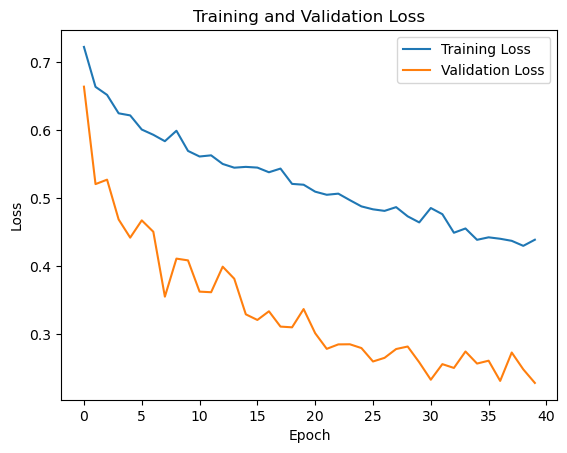

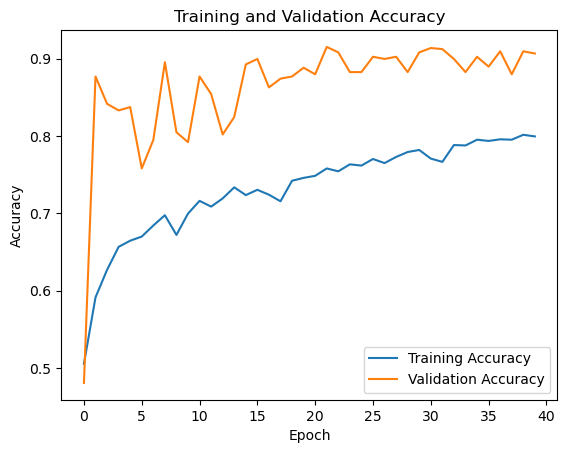

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# Test verilerini yeniden ölçeklendirme
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
test_generator = test_datagen.flow_from_directory(
    'C:\\Users\\aeter\\OneDrive\\Masaüstü\\DS\\test_final',  # test verilerinizin yolu
    target_size=(256, 256),
    batch_size=1,  # Her seferinde bir görüntü yükle
    class_mode='binary',
    shuffle=False
)


Found 100 images belonging to 2 classes.


1/1 [==============================] - 1s 553ms/step


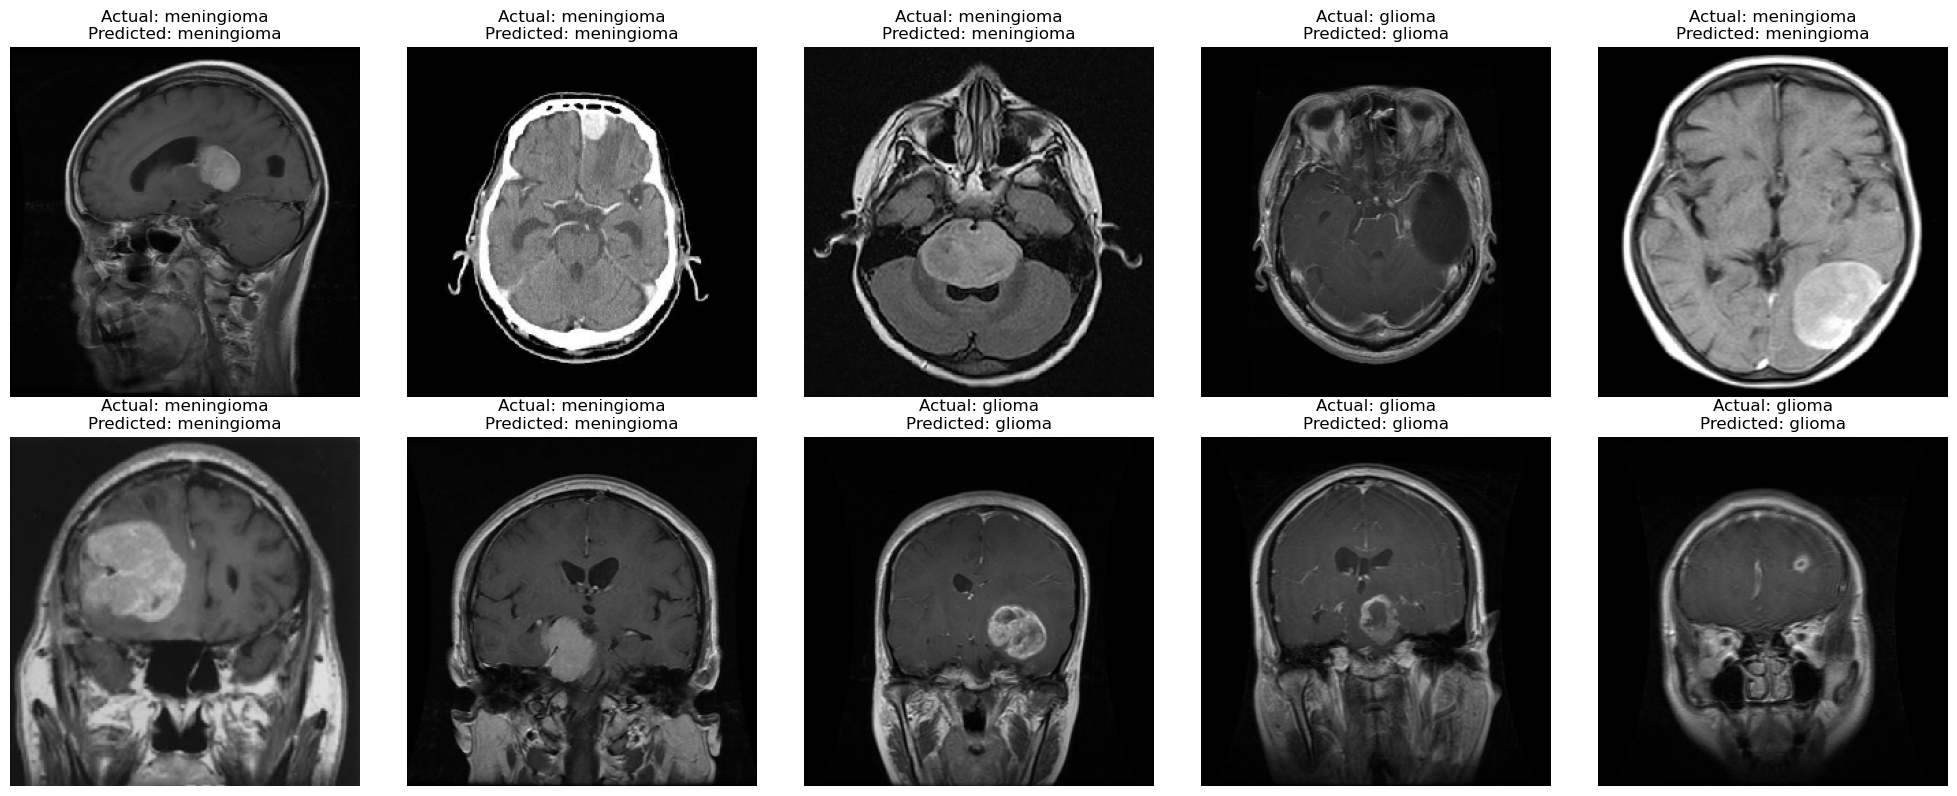

4/4 [==============================] - 1s 132ms/step
Confusion Matrix:
 [[45  4]
 [ 3 48]]


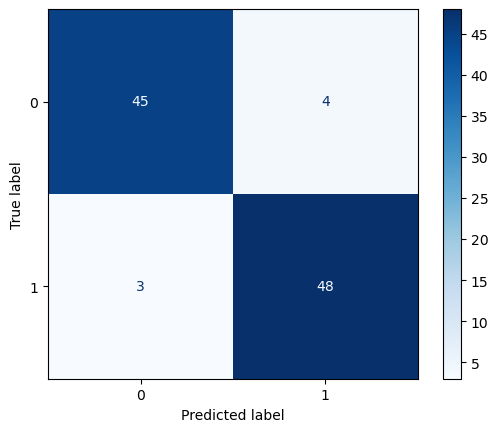

In [17]:
import random
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Verileri toplama ve işleme
test_generator.reset()
all_images = []
all_labels = []
filenames = []

for i in range(len(test_generator)):
    img, label = test_generator.next()
    all_images.append(img)
    all_labels.append(label)
    filenames.append(test_generator.filenames[test_generator.batch_index - 1])

# Listeleri numpy dizilerine dönüştürme
all_images = np.array(all_images).reshape(len(test_generator) * test_generator.batch_size, 256, 256, 3)
all_labels = np.array(all_labels).reshape(len(test_generator) * test_generator.batch_size)

# Rastgele 10 örnek görüntü seçme
num_samples = 10
random_indices = random.sample(range(len(all_images)), num_samples)
sample_images = all_images[random_indices]
sample_labels = all_labels[random_indices]

# Tahmin yapma
predictions = model.predict(sample_images)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Görüntüleri ve tahminleri görselleştirme
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i in range(num_samples):
    axes[i].imshow(sample_images[i])
    axes[i].set_title(f"Actual: {'meningioma' if sample_labels[i] == 1 else 'glioma'}\nPredicted: {'meningioma' if predicted_labels[i] == 1 else 'glioma'}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Karmaşıklık matrisi hesaplama ve görselleştirme
# Tüm verilerle tahmin yapma
all_predictions = model.predict(all_images)
all_predicted_labels = (all_predictions > 0.5).astype(int).flatten()

# Karmaşıklık matrisi hesapla
cm = confusion_matrix(all_labels, all_predicted_labels)
print("Confusion Matrix:\n", cm)

# Karmaşıklık matrisi görselleştirme
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [18]:
model.save('model.h5')
